In [1]:
import os
import json
import openpyxl
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Define the paths to the folders
folder1_path = "RawData/Uploaded-files-experiment/Q34"
folder2_path = "RawData/Uploaded-files-experiment/Q35"

json_storage = {}

# Loop over each folder
for folder_path in [folder1_path, folder2_path]:
    # Loop over each file in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is a JSON file
        if file_name.endswith('.json'):
            # Read the JSON file and print its contents
            with open(os.path.join(folder_path, file_name), 'r') as json_file:
                json_data = json.load(json_file)
                json_storage[file_name.replace('.json', '')] = json_data

ground_truth_A_json = {}
ground_truth_B_json = {}

with open(os.path.join("Group_A_ground_truth", "1_a8bcdf06417e5f0cc3eecf20484144d6f033c200.json"), 'r') as json_file:
    ground_truth_A_json = json.load(json_file)

with open(os.path.join("Group_B_ground_truth", "1_a8bcdf06417e5f0cc3eecf20484144d6f033c200.json"), 'r') as json_file:
    ground_truth_B_json = json.load(json_file)

Reading the excel file and make dictionary of all data necessary for assignment

In [3]:
def match_evidence(ground_truth_evidences, student_evidences, method):
    # Calculate the minimum number of matching strings required
    if method == 'exact':
        flag = match_evidence(ground_truth_evidences, student_evidences, 'all')
        if flag == True and len(ground_truth_evidences) == len(student_evidences):
            return True
        else:
            return False
    if method == 'all':
        min_matches = len(ground_truth_evidences)
    if method == 'half':
        min_matches = math.ceil(len(ground_truth_evidences) / 2) 

    # Count the number of matching strings
    num_matches = 0
    for s1 in ground_truth_evidences:
        for s2 in student_evidences:
            if s1 == s2:
                num_matches += 1
                break  # Move on to the next string in arr1

    # Return True if the number of matching strings is greater than or equal to min_matches
    return num_matches >= min_matches


Criteria 3

In [4]:
match_method = 'half'

wb = openpyxl.load_workbook('RawData/E4-data-cleaned-experiment.xlsx')

# Select the sheet to read data from
sheet = wb['Sheet0']

# Get the maximum number of rows in the sheet
max_row = sheet.max_row

# Define the column to read data from
group_column = 17
student_name_column = 15
duration_column = 5

#response_id is same as file name
response_id_column = 8

students_result = {
    "Group A": {
        "only_assessment_match": {
            "students": [],
            "accuracy": None
        },
        "only_evidence_match": {
            "students": [],
            "accuracy": None
        },
        "both_match": {
            "students": [],
            "accuracy": None
        },
        "no_match": {
            "students": [],
            "accuracy": None
        }
    },
    "Group B": {
        "only_assessment_match": {
            "students": [],
            "accuracy": None
        },
        "only_evidence_match": {
            "students": [],
            "accuracy": None
        },
        "both_match": {
            "students": [],
            "accuracy": None
        },
        "no_match": {
            "students": [],
            "accuracy": None
        }
    },
}

assessmentsForRequirements_array_index = {
    "Group A": 12,
    "Group B": 3
}

students_count = max_row - 2

group_A_students_count = 0
group_B_students_count = 0

for i in range(3, max_row + 1):
    row_group = sheet.cell(row=i, column=group_column).value
    file_name = sheet.cell(row=i, column=response_id_column).value
    student_name = sheet.cell(row=i, column=student_name_column).value
    duration = sheet.cell(row=i, column=duration_column).value

    student_json = json_storage[file_name]

    ground_truth_target_file = ground_truth_A_json if row_group == "Group A" else ground_truth_B_json

    if row_group == "Group A":
        group_A_students_count += 1
    if row_group == "Group B":
        group_B_students_count += 1

    final_index = assessmentsForRequirements_array_index[row_group]
    student_verdict = student_json["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["assessment"]["verdict"]
    ground_truth_verdict = ground_truth_target_file["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["assessment"]["verdict"]

    student_evidence_list = student_json["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["evidences"]
    ground_truth_evidence_list = ground_truth_target_file["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["evidences"]

    student_evidence_list_names = list(map(lambda evidence: evidence['name'], student_evidence_list))
    ground_truth_evidence_list_names = list(map(lambda evidence: evidence['name'], ground_truth_evidence_list))

    assessment_matched = student_verdict == ground_truth_verdict
    evidence_matched = match_evidence(ground_truth_evidence_list_names, student_evidence_list_names, match_method)

    target_match = "no_match"

    if assessment_matched == True and evidence_matched == False:
        target_match = "only_assessment_match"
    elif assessment_matched == False and evidence_matched == True:
        target_match = "only_evidence_match"
    elif assessment_matched == True and evidence_matched == True:
        target_match = "both_match"

    students_result[row_group][target_match]["students"].append({
        "response_id": file_name,
        "student_name": student_name,
        "assessment_matched": student_verdict == ground_truth_verdict,
        "evidence_matched": match_evidence(ground_truth_evidence_list_names, student_evidence_list_names, match_method),
        "assessment_verdict": student_verdict,
        "duration": duration
    })

print(f"group A count = {group_A_students_count}")
print(f"group B count = {group_B_students_count}")
print(students_result)

group A count = 36
group B count = 38
{'Group A': {'only_assessment_match': {'students': [{'response_id': 'R_TwtS0aMLQlcu0Ex', 'student_name': 'Zengyi', 'assessment_matched': True, 'evidence_matched': False, 'assessment_verdict': 'Passed', 'duration': 3000}, {'response_id': 'R_C1trzBHt1BaBieZ', 'student_name': 'Jiacheng', 'assessment_matched': True, 'evidence_matched': False, 'assessment_verdict': 'Passed', 'duration': 1885}, {'response_id': 'R_3qBvOd2MWE4iQEo', 'student_name': 'Lu', 'assessment_matched': True, 'evidence_matched': False, 'assessment_verdict': 'Passed', 'duration': 4463}, {'response_id': 'R_rfJLTnN1AqlXsm5', 'student_name': 'Vishal Kanteppa', 'assessment_matched': True, 'evidence_matched': False, 'assessment_verdict': 'Passed', 'duration': 3275}, {'response_id': 'R_UtMKgPB2q3sRvnX', 'student_name': 'Rohaan', 'assessment_matched': True, 'evidence_matched': False, 'assessment_verdict': 'Passed', 'duration': 3077}, {'response_id': 'R_3qCY6InkwnxlRc0', 'student_name': 'Hao'

Calculating the accuracy and save it in students_result

In [5]:
for group, correctnesses in students_result.items():
    print(f"Assessing {group}")
    total_group_count = group_A_students_count if group == "Group A" else group_B_students_count
    for correctness_group_name, correctness_obj in correctnesses.items():
        print(f"#### {correctness_group_name} #####")
        print(f'number of students = {len(correctness_obj["students"])}')
        accuracy = len(correctness_obj["students"])/total_group_count
        print(f"accuracy = ${accuracy}")
        correctness_obj["accuracy"] = accuracy
    # only_assessment_match

Assessing Group A
#### only_assessment_match #####
number of students = 6
accuracy = $0.16666666666666666
#### only_evidence_match #####
number of students = 7
accuracy = $0.19444444444444445
#### both_match #####
number of students = 20
accuracy = $0.5555555555555556
#### no_match #####
number of students = 3
accuracy = $0.08333333333333333
Assessing Group B
#### only_assessment_match #####
number of students = 1
accuracy = $0.02631578947368421
#### only_evidence_match #####
number of students = 16
accuracy = $0.42105263157894735
#### both_match #####
number of students = 21
accuracy = $0.5526315789473685
#### no_match #####
number of students = 0
accuracy = $0.0


In [6]:
def box_chart(array1, array2, array3, labels, xaxis_title, yaxis_title, title):
    # Calculate the mean and median of each array
    mean1 = np.mean(array1)
    mean2 = np.mean(array2)
    mean3 = np.mean(array3)

    print(f"array1 mean = {mean1}")
    print(f"array2 mean = {mean2}")
    print(f"array2 mean = {mean3}")

    plt.style.use('seaborn')
    sns.set(style="white")
    plt.figure(figsize=(14, 7))
    # Create a side-by-side box plot
    plt.boxplot([array1, array2, array3])
    plt.xticks([1, 2, 3], labels)
    plt.xlabel(xaxis_title, fontsize=14)
    plt.ylabel(yaxis_title, fontsize=14)
    plt.title(title, fontsize=18)

    # Add mean markers to the plot
    plt.plot([1, 2, 3], [mean1, mean2, mean3], marker='o', color='red', linestyle='None')

    plt.text(1, mean1 + 200, '{0:.0f}'.format(mean1), ha='center')
    plt.text(2, mean2 - 200, '{0:.0f}'.format(mean2), ha='center')
    plt.text(3, mean3 - 200, '{0:.0f}'.format(mean3), ha='center')

    plt.legend(handles=[plt.Line2D([], [], color="white", marker='o', markerfacecolor="red", label='Mean'),
                        plt.Line2D([0], [0], marker='_', color='orange', linestyle='None', label='Median')])

    # plt.tight_layout()
    plt.savefig(f'images/{title}.png')
    # plt.show()

array1 mean = 3335.6666666666665
array2 mean = 4019.4285714285716
array2 mean = 4072.3


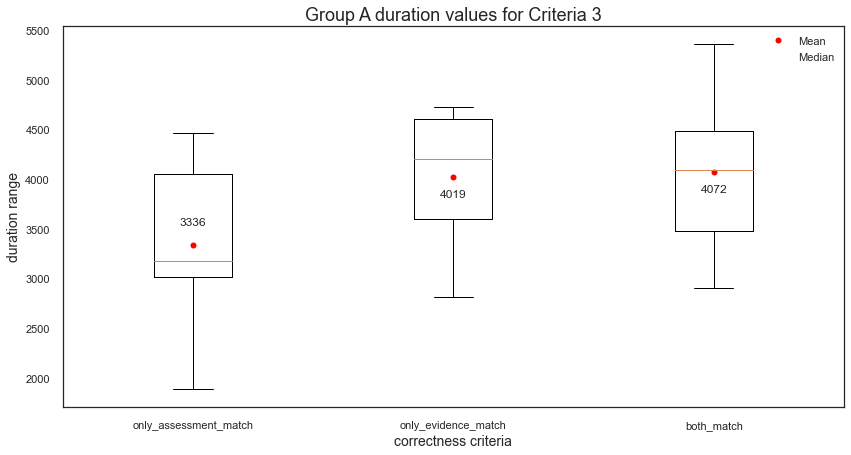

In [7]:
group = "Group A"
target = students_result[group]
target["only_assessment_match"]["students"]

oam = list(map(lambda student: student['duration'], target["only_assessment_match"]["students"]))
oem = list(map(lambda student: student['duration'], target["only_evidence_match"]["students"]))
bm = list(map(lambda student: student['duration'], target["both_match"]["students"]))

box_chart(oam, oem, bm, ["only_assessment_match","only_evidence_match","both_match"], "correctness criteria", "duration range", group + " duration values for Criteria 3")

In [8]:
df_a = pd.DataFrame(bm, columns = ['Duration'])

array1 mean = 2260.0
array2 mean = 3594.8125
array2 mean = 3191.714285714286


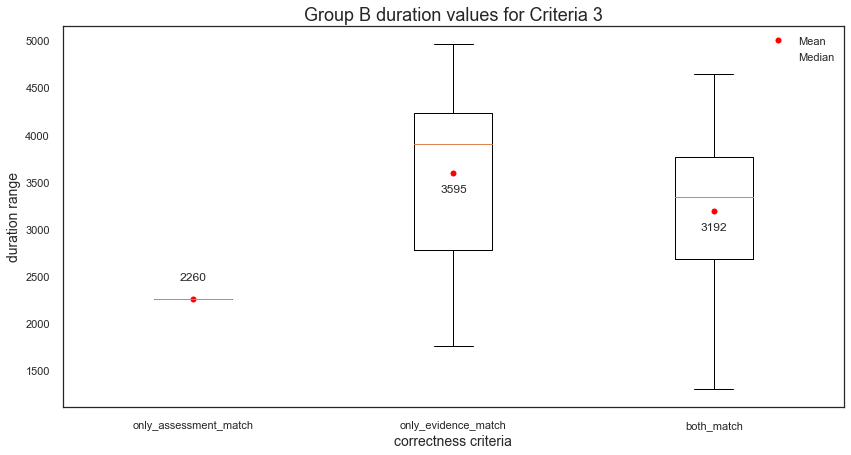

In [9]:
# group B
group = "Group B"
target = students_result[group]

oam = list(map(lambda student: student['duration'], target["only_assessment_match"]["students"]))
oem = list(map(lambda student: student['duration'], target["only_evidence_match"]["students"]))
bm = list(map(lambda student: student['duration'], target["both_match"]["students"]))

box_chart(oam, oem, bm, ["only_assessment_match","only_evidence_match","both_match"], "correctness criteria", "duration range", group + " duration values for Criteria 3")

In [10]:
df_b = pd.DataFrame(bm, columns = ['Duration'])

In [11]:
def boxplot_stripplot(df, metric, y, title='', xlabel='Duration', ylabel='Group'):
    sns.boxplot(data=df[[metric, y]], x=metric, y=y)

    # Add in points to show each observation
    sns.stripplot(data=df[[metric, y]], x=metric, y=y,
                size=4, color=".3", linewidth=0)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()

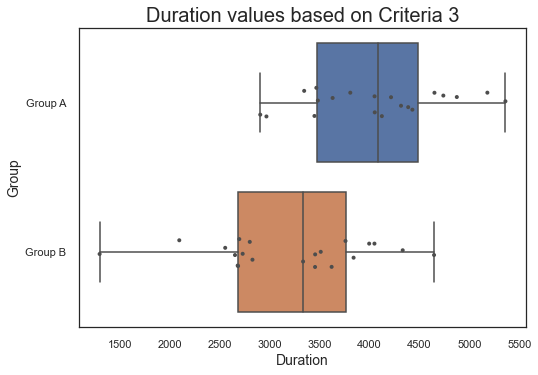

In [12]:
df_a['Group'] = 'Group A'
df_b['Group'] = 'Group B'

df_duration = pd.concat([df_a,df_b])
boxplot_stripplot(df_duration, 'Duration', 'Group', title='Duration values based on Criteria 3')

In [13]:
df_a['Criteria'] = 'Criteria 3'

Criteria 1

In [14]:
match_method = 'exact'

wb = openpyxl.load_workbook('RawData/E4-data-cleaned-experiment.xlsx')

# Select the sheet to read data from
sheet = wb['Sheet0']

# Get the maximum number of rows in the sheet
max_row = sheet.max_row

# Define the column to read data from
group_column = 17
student_name_column = 15
duration_column = 5

#response_id is same as file name
response_id_column = 8

students_result = {
    "Group A": {
        "only_assessment_match": {
            "students": [],
            "accuracy": None
        },
        "only_evidence_match": {
            "students": [],
            "accuracy": None
        },
        "both_match": {
            "students": [],
            "accuracy": None
        },
        "no_match": {
            "students": [],
            "accuracy": None
        }
    },
    "Group B": {
        "only_assessment_match": {
            "students": [],
            "accuracy": None
        },
        "only_evidence_match": {
            "students": [],
            "accuracy": None
        },
        "both_match": {
            "students": [],
            "accuracy": None
        },
        "no_match": {
            "students": [],
            "accuracy": None
        }
    },
}

assessmentsForRequirements_array_index = {
    "Group A": 12,
    "Group B": 3
}

students_count = max_row - 2

group_A_students_count = 0
group_B_students_count = 0

for i in range(3, max_row + 1):
    row_group = sheet.cell(row=i, column=group_column).value
    file_name = sheet.cell(row=i, column=response_id_column).value
    student_name = sheet.cell(row=i, column=student_name_column).value
    duration = sheet.cell(row=i, column=duration_column).value

    student_json = json_storage[file_name]

    ground_truth_target_file = ground_truth_A_json if row_group == "Group A" else ground_truth_B_json

    if row_group == "Group A":
        group_A_students_count += 1
    if row_group == "Group B":
        group_B_students_count += 1

    final_index = assessmentsForRequirements_array_index[row_group]
    student_verdict = student_json["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["assessment"]["verdict"]
    ground_truth_verdict = ground_truth_target_file["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["assessment"]["verdict"]

    student_evidence_list = student_json["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["evidences"]
    ground_truth_evidence_list = ground_truth_target_file["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["evidences"]

    student_evidence_list_names = list(map(lambda evidence: evidence['name'], student_evidence_list))
    ground_truth_evidence_list_names = list(map(lambda evidence: evidence['name'], ground_truth_evidence_list))

    assessment_matched = student_verdict == ground_truth_verdict
    evidence_matched = match_evidence(ground_truth_evidence_list_names, student_evidence_list_names, match_method)

    target_match = "no_match"

    if assessment_matched == True and evidence_matched == False:
        target_match = "only_assessment_match"
    elif assessment_matched == False and evidence_matched == True:
        target_match = "only_evidence_match"
    elif assessment_matched == True and evidence_matched == True:
        target_match = "both_match"

    students_result[row_group][target_match]["students"].append({
        "response_id": file_name,
        "student_name": student_name,
        "assessment_matched": student_verdict == ground_truth_verdict,
        "evidence_matched": match_evidence(ground_truth_evidence_list_names, student_evidence_list_names, match_method),
        "assessment_verdict": student_verdict,
        "duration": duration
    })

group = "Group A"
target = students_result[group]

bm_a = list(map(lambda student: student['duration'], target["both_match"]["students"]))
df_a_1 = pd.DataFrame(bm_a, columns = ['Duration'])
df_a_1['Criteria'] = 'Criteria 1'


group = "Group B"
target = students_result[group]

bm_b = list(map(lambda student: student['duration'], target["both_match"]["students"]))
df_b_1 = pd.DataFrame(bm_b, columns = ['Duration'])
df_b_1['Criteria'] = 'Criteria 1'

Criteria 2

In [15]:
match_method = 'all'

wb = openpyxl.load_workbook('RawData/E4-data-cleaned-experiment.xlsx')

# Select the sheet to read data from
sheet = wb['Sheet0']

# Get the maximum number of rows in the sheet
max_row = sheet.max_row

# Define the column to read data from
group_column = 17
student_name_column = 15
duration_column = 5

#response_id is same as file name
response_id_column = 8

students_result = {
    "Group A": {
        "only_assessment_match": {
            "students": [],
            "accuracy": None
        },
        "only_evidence_match": {
            "students": [],
            "accuracy": None
        },
        "both_match": {
            "students": [],
            "accuracy": None
        },
        "no_match": {
            "students": [],
            "accuracy": None
        }
    },
    "Group B": {
        "only_assessment_match": {
            "students": [],
            "accuracy": None
        },
        "only_evidence_match": {
            "students": [],
            "accuracy": None
        },
        "both_match": {
            "students": [],
            "accuracy": None
        },
        "no_match": {
            "students": [],
            "accuracy": None
        }
    },
}

assessmentsForRequirements_array_index = {
    "Group A": 12,
    "Group B": 3
}

students_count = max_row - 2

group_A_students_count = 0
group_B_students_count = 0

for i in range(3, max_row + 1):
    row_group = sheet.cell(row=i, column=group_column).value
    file_name = sheet.cell(row=i, column=response_id_column).value
    student_name = sheet.cell(row=i, column=student_name_column).value
    duration = sheet.cell(row=i, column=duration_column).value

    student_json = json_storage[file_name]

    ground_truth_target_file = ground_truth_A_json if row_group == "Group A" else ground_truth_B_json

    if row_group == "Group A":
        group_A_students_count += 1
    if row_group == "Group B":
        group_B_students_count += 1

    final_index = assessmentsForRequirements_array_index[row_group]
    student_verdict = student_json["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["assessment"]["verdict"]
    ground_truth_verdict = ground_truth_target_file["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["assessment"]["verdict"]

    student_evidence_list = student_json["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["evidences"]
    ground_truth_evidence_list = ground_truth_target_file["AssessmentForRequirement"]["assessmentsForRequirements"][final_index]["evidences"]

    student_evidence_list_names = list(map(lambda evidence: evidence['name'], student_evidence_list))
    ground_truth_evidence_list_names = list(map(lambda evidence: evidence['name'], ground_truth_evidence_list))

    assessment_matched = student_verdict == ground_truth_verdict
    evidence_matched = match_evidence(ground_truth_evidence_list_names, student_evidence_list_names, match_method)

    target_match = "no_match"

    if assessment_matched == True and evidence_matched == False:
        target_match = "only_assessment_match"
    elif assessment_matched == False and evidence_matched == True:
        target_match = "only_evidence_match"
    elif assessment_matched == True and evidence_matched == True:
        target_match = "both_match"

    students_result[row_group][target_match]["students"].append({
        "response_id": file_name,
        "student_name": student_name,
        "assessment_matched": student_verdict == ground_truth_verdict,
        "evidence_matched": match_evidence(ground_truth_evidence_list_names, student_evidence_list_names, match_method),
        "assessment_verdict": student_verdict,
        "duration": duration
    })

group = "Group A"
target = students_result[group]

bm_a = list(map(lambda student: student['duration'], target["both_match"]["students"]))
df_a_2 = pd.DataFrame(bm_a, columns = ['Duration'])
df_a_2['Criteria'] = 'Criteria 2'


group = "Group B"
target = students_result[group]

bm_b = list(map(lambda student: student['duration'], target["both_match"]["students"]))
df_b_2 = pd.DataFrame(bm_b, columns = ['Duration'])
df_b_2['Criteria'] = 'Criteria 2'


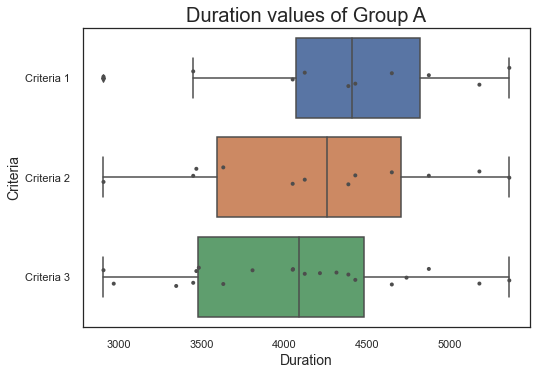

In [16]:
df_criteria = pd.concat([df_a_1, df_a_2, df_a])
boxplot_stripplot(df_criteria, 'Duration', 'Criteria', title='Duration values of Group A', ylabel='Criteria')

Only for Criteria 3

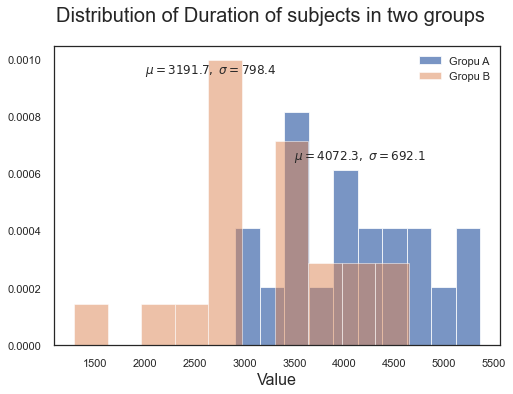

In [17]:
plt.hist(df_a['Duration'], label='Gropu A', density=True, alpha=0.75)
plt.hist(df_b['Duration'], label='Gropu B', density=True, alpha=0.5)
plt.legend()
plt.suptitle("Distribution of Duration of subjects in two groups", fontsize=20)
plt.xlabel("Value", fontsize=16)
# plt.ylabel("Count", fontsize=16)

# plt.text(0.75, 2.525,
#          f"$\mu= {df_measurement['F1'][df_measurement['Group'] == 'Group A'].mean(): .1f}, \ \sigma= {df_measurement['F1'][df_measurement['Group'] == 'Group A'].std(): .1f}$")
plt.text(3500, 0.00065,
         f"$\mu= {df_a['Duration'].mean(): .1f}, \ \sigma= {df_a['Duration'].std(): .1f}$")
plt.text(2000, 0.00095,
         f"$\mu= {df_b['Duration'].mean(): .1f}, \ \sigma= {df_b['Duration'].std(): .1f}$")
# plt.tight_layout()
plt.savefig('images/hist.png')
plt.show()

Performing Shapiro-Wilk test to see if data is normally distributed

In [18]:
from scipy import stats
import numpy as np

# The null hypothesis of the Shapiro-Wilk test is that the dataset is normally distributed.

def shapiro_wilk_test(data):
    """
    Performs the Shapiro-Wilk test for normality on a given dataset.

    Parameters:
        data (numpy.ndarray): Input data to test for normality.

    Returns:
        tuple: Tuple containing the test statistic, p-value, and a string indicating whether
               the null hypothesis is rejected or not.
    """
    stat, p = stats.shapiro(data)

    if p > 0.05:
        result = 'Data is normally distributed (fail to reject H0)'
    else:
        result = 'Data is NOT normally distributed (reject H0)'

    return stat, p, result


In [19]:
stat, p, result = shapiro_wilk_test(df_a['Duration'])

print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)
print(result)

Shapiro-Wilk test statistic: 0.9766508340835571
p-value: 0.8839609026908875
Data is normally distributed (fail to reject H0)


In [20]:
stat, p, result = shapiro_wilk_test(df_b['Duration'])

print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)
print(result)

Shapiro-Wilk test statistic: 0.9643269181251526
p-value: 0.6071416735649109
Data is normally distributed (fail to reject H0)


Now That we see data are normally distributed, we can apply ttest

In [21]:
def ttest(data_a, data_b):
    group_a = list(data_a)
    group_b = list(data_b)

    # Calculate t-value and p-value
    t, p = stats.ttest_ind(group_a, group_b)

    return '{0:.6f}'.format(t), '{0:.6f}'.format(p)

In [22]:
t_value, p_value = ttest(df_a['Duration'], df_b['Duration'])
print(f"t-value = {t_value}")
print(f"p-value = {p_value}")

t-value = 3.765400
p-value = 0.000548


In [23]:
t_value, p_value = ttest(df_a_1['Duration'], df_b_1['Duration'])
print(f"t-value = {t_value}")
print(f"p-value = {p_value}")

t-value = 3.812502
p-value = 0.000664


In [24]:
t_value, p_value = ttest(df_a_2['Duration'], df_b_2['Duration'])
print(f"t-value = {t_value}")
print(f"p-value = {p_value}")

t-value = 3.599479
p-value = 0.001096
